# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set_theme(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [57]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [58]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [59]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [60]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

In [61]:
for col in date:
    client_df[col] = pd.to_datetime(client_df[col], format='%Y-%m-%d')

In [62]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

#### Client Data

In [9]:
# check the duplicates in the data
client_df.duplicated().sum()

0

In [10]:
# identify missing values
client_df.isnull().sum().sum()

0

In [11]:
# display all columns
pd.set_option('display.max_columns', None) 

In [12]:
# drop unnecessary columns with high cardinality
client_df.drop(['channel_sales', 'origin_up'], axis=1, inplace= True) 

In [13]:
client_df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0


In [14]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [16]:
client_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0


In [64]:
# prepare the id data for the distribution plot
y= client_df['id']
X= client_df.drop('id', axis = 1) 

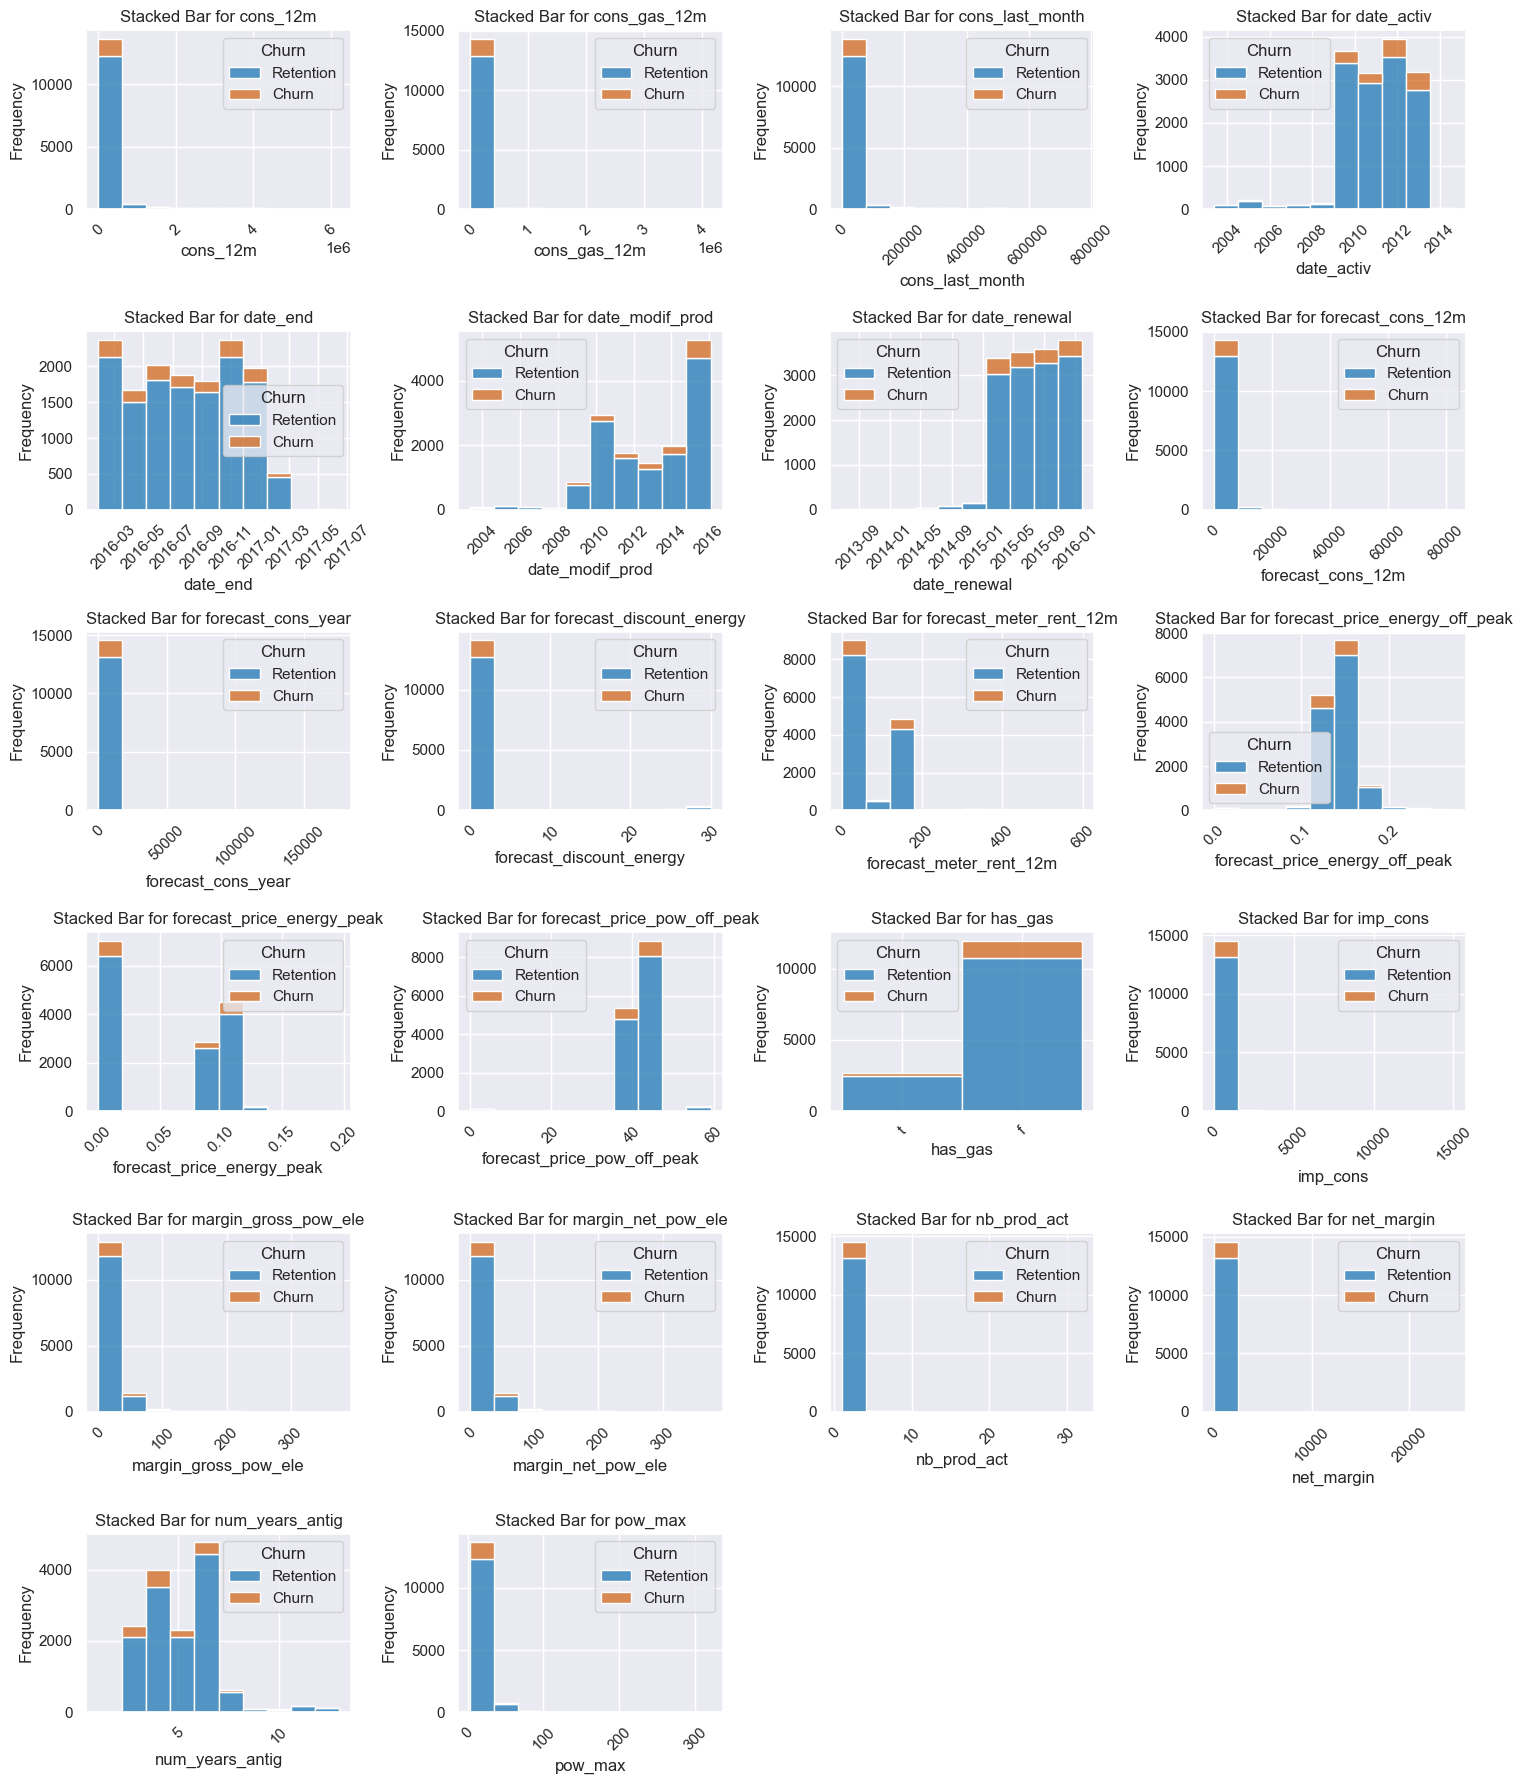

In [29]:
import warnings
warnings.filterwarnings('ignore', 'use_inf_as_na option is deprecated')
 
plt.figure(figsize=(15, 18))
for i, feature in enumerate(X.columns[:-1]):  # Exclude the 'Churn' column
    plt.subplot(6, 4, i + 1)
    
    # Create a custom palette to reverse the default colors
    custom_palette = {0: 'tab:blue', 1: 'chocolate'}
    sns.histplot(data=X, x=feature, hue='churn', multiple= 'stack', bins=10, hue_order=[1, 0], palette=custom_palette) 
    plt.title(f'Stacked Bar for {feature}')
    # x ticks rotate 45 degree
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['Retention', 'Churn'])
    
plt.tight_layout()
plt.show(); 

In [28]:
# merge the target variable back to the data
client_df = pd.concat([X, y], axis=1) 

#### Price Data

In [100]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [17]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [18]:
price_df.duplicated().sum()

0

In [19]:
price_df.isnull().sum().sum()

0

In [20]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

In [113]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [23]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. 
The second function `annotate_bars` is used by the first function.

### Churn Status

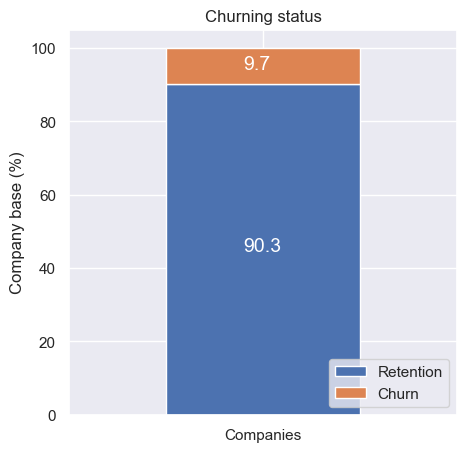

In [24]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### Consumption

The third function `plot_distribution` helps to plot the distribution of a numeric column.

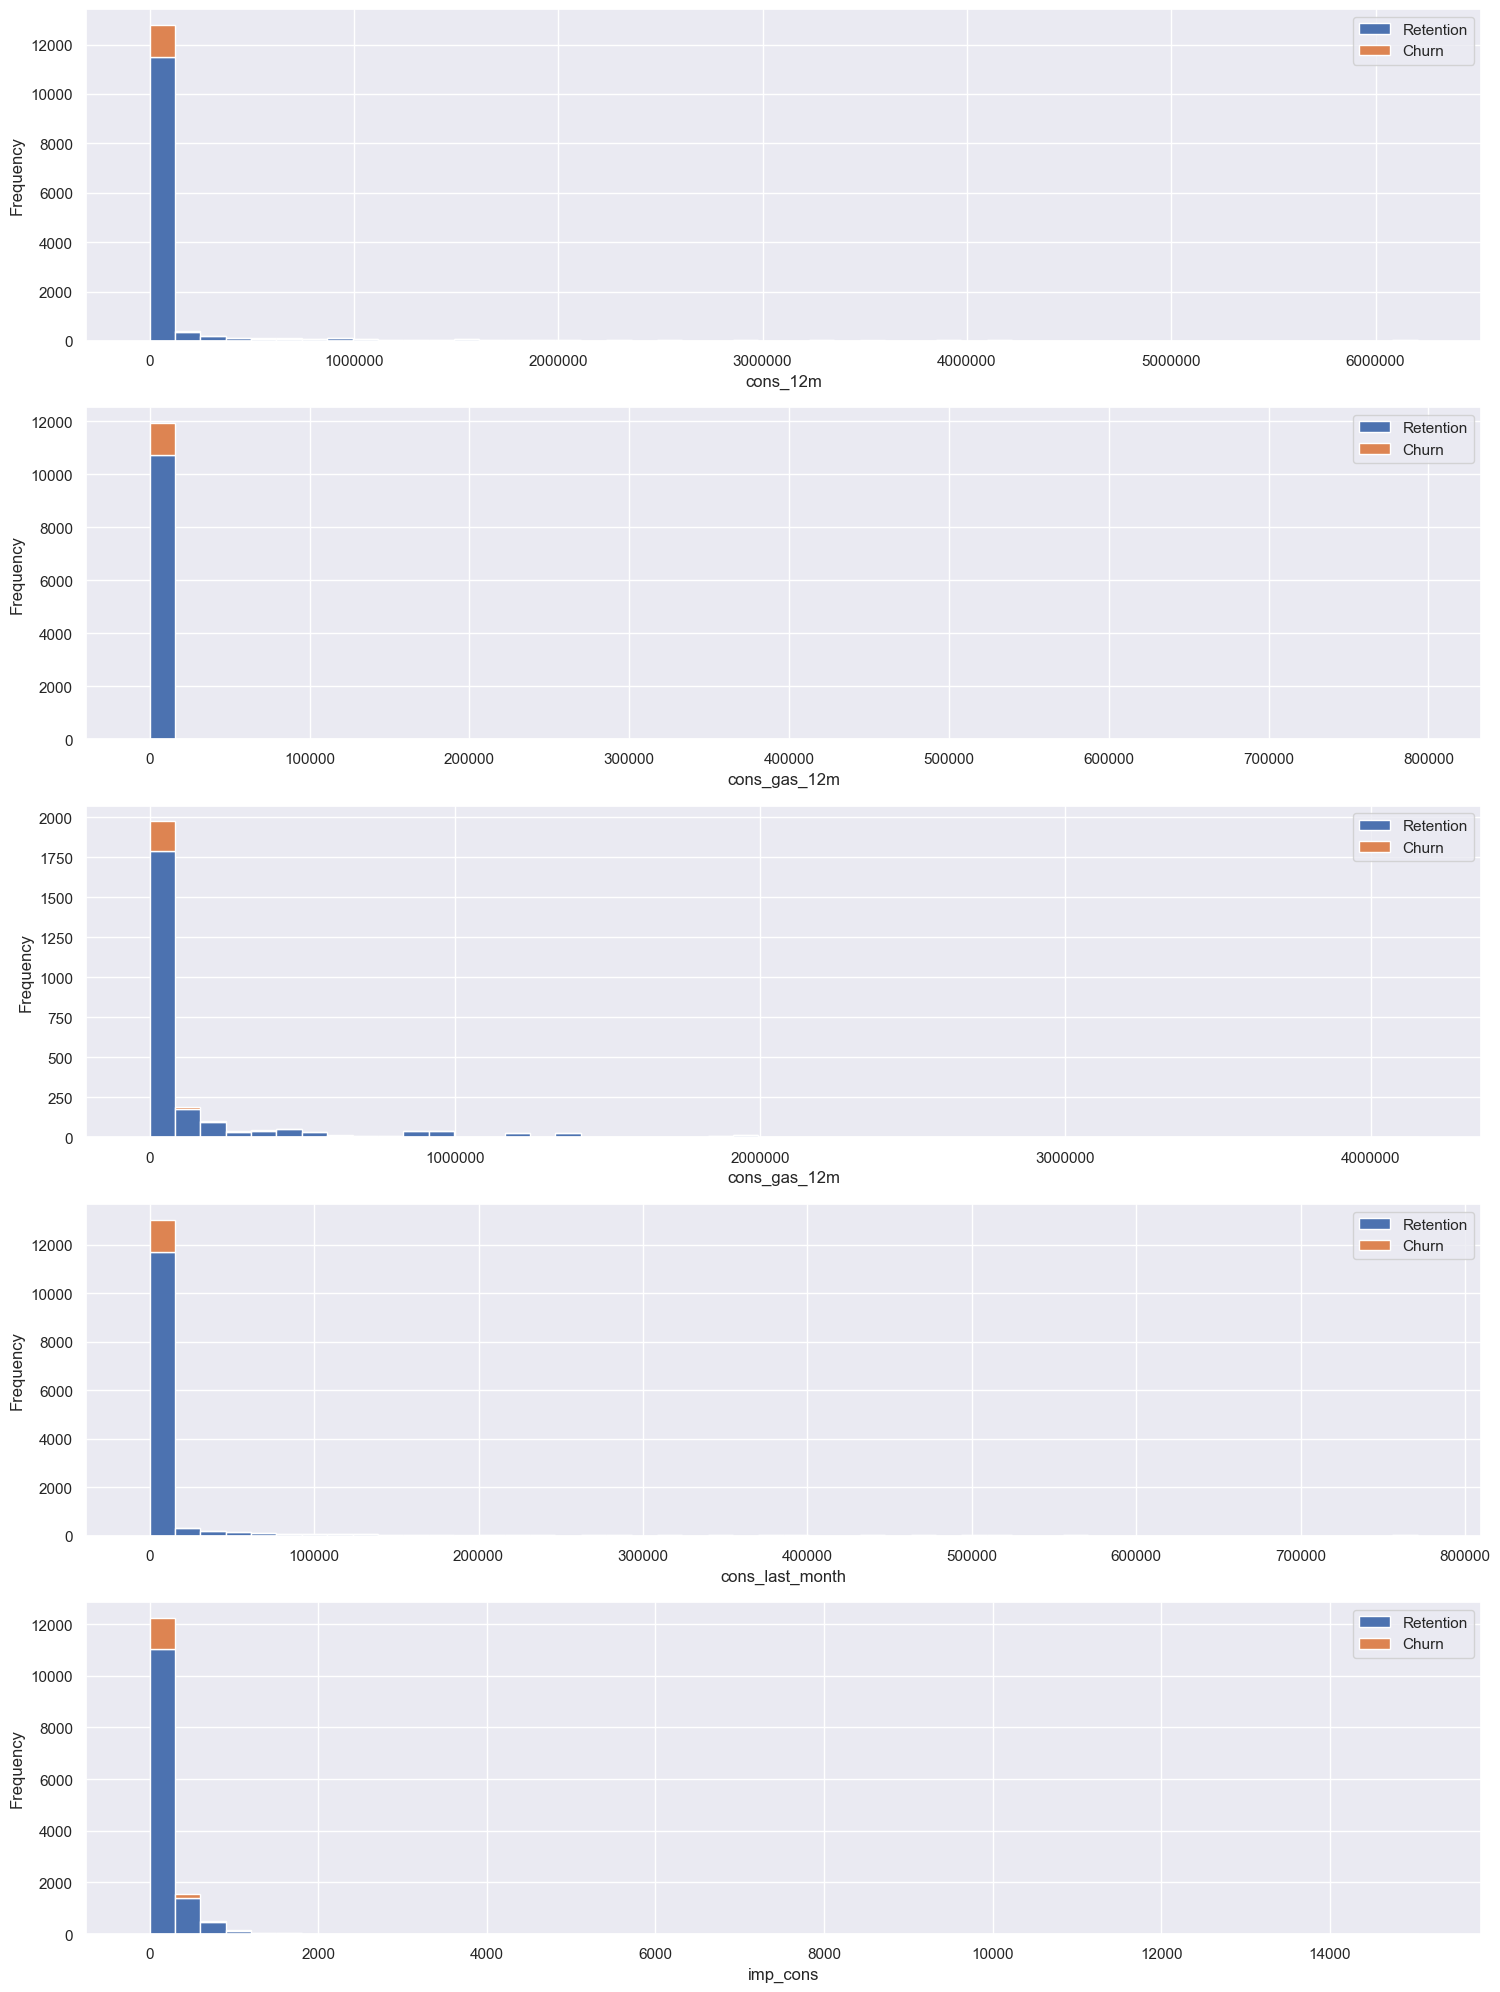

In [33]:
# Create a figure about the distribution of the consumption variables
fig, axs = plt.subplots(nrows=5, figsize=(18, 25))

# the distribution of electricity consumption of the past 12 months
plot_distribution(client_df, 'cons_12m', axs[0]) 
# the distribution of gas consumption of the past 12 months
# only the rows with no gas consumption
plot_distribution(client_df[client_df['has_gas'] == 'f'], 'cons_gas_12m', axs[1]) 
# only the rows with gas consumption
plot_distribution(client_df[client_df['has_gas'] == 't'], 'cons_gas_12m', axs[2]) 
# the distribution of electricity consumption of the last month
plot_distribution(client_df, 'cons_last_month', axs[3])
# the distribution of current paid consumption
plot_distribution(client_df, 'imp_cons', axs[4])

In [30]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

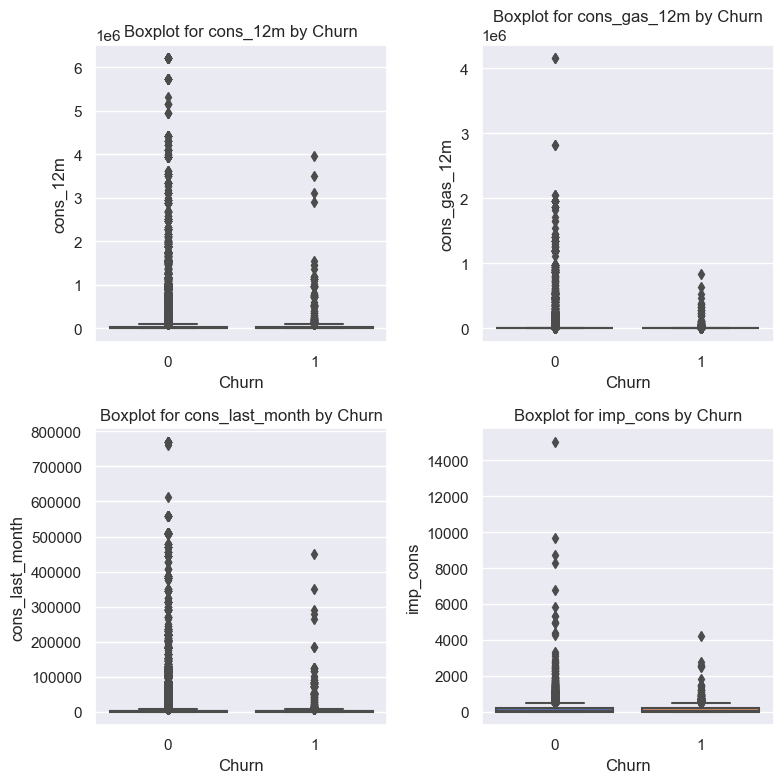

In [31]:
plt.figure(figsize=(8, 8))
for i, column in enumerate(consumption.columns):
    plt.subplot(2, 2, i + 1)
    
    sns.boxplot(data=consumption, x=client_df['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

### Forecast

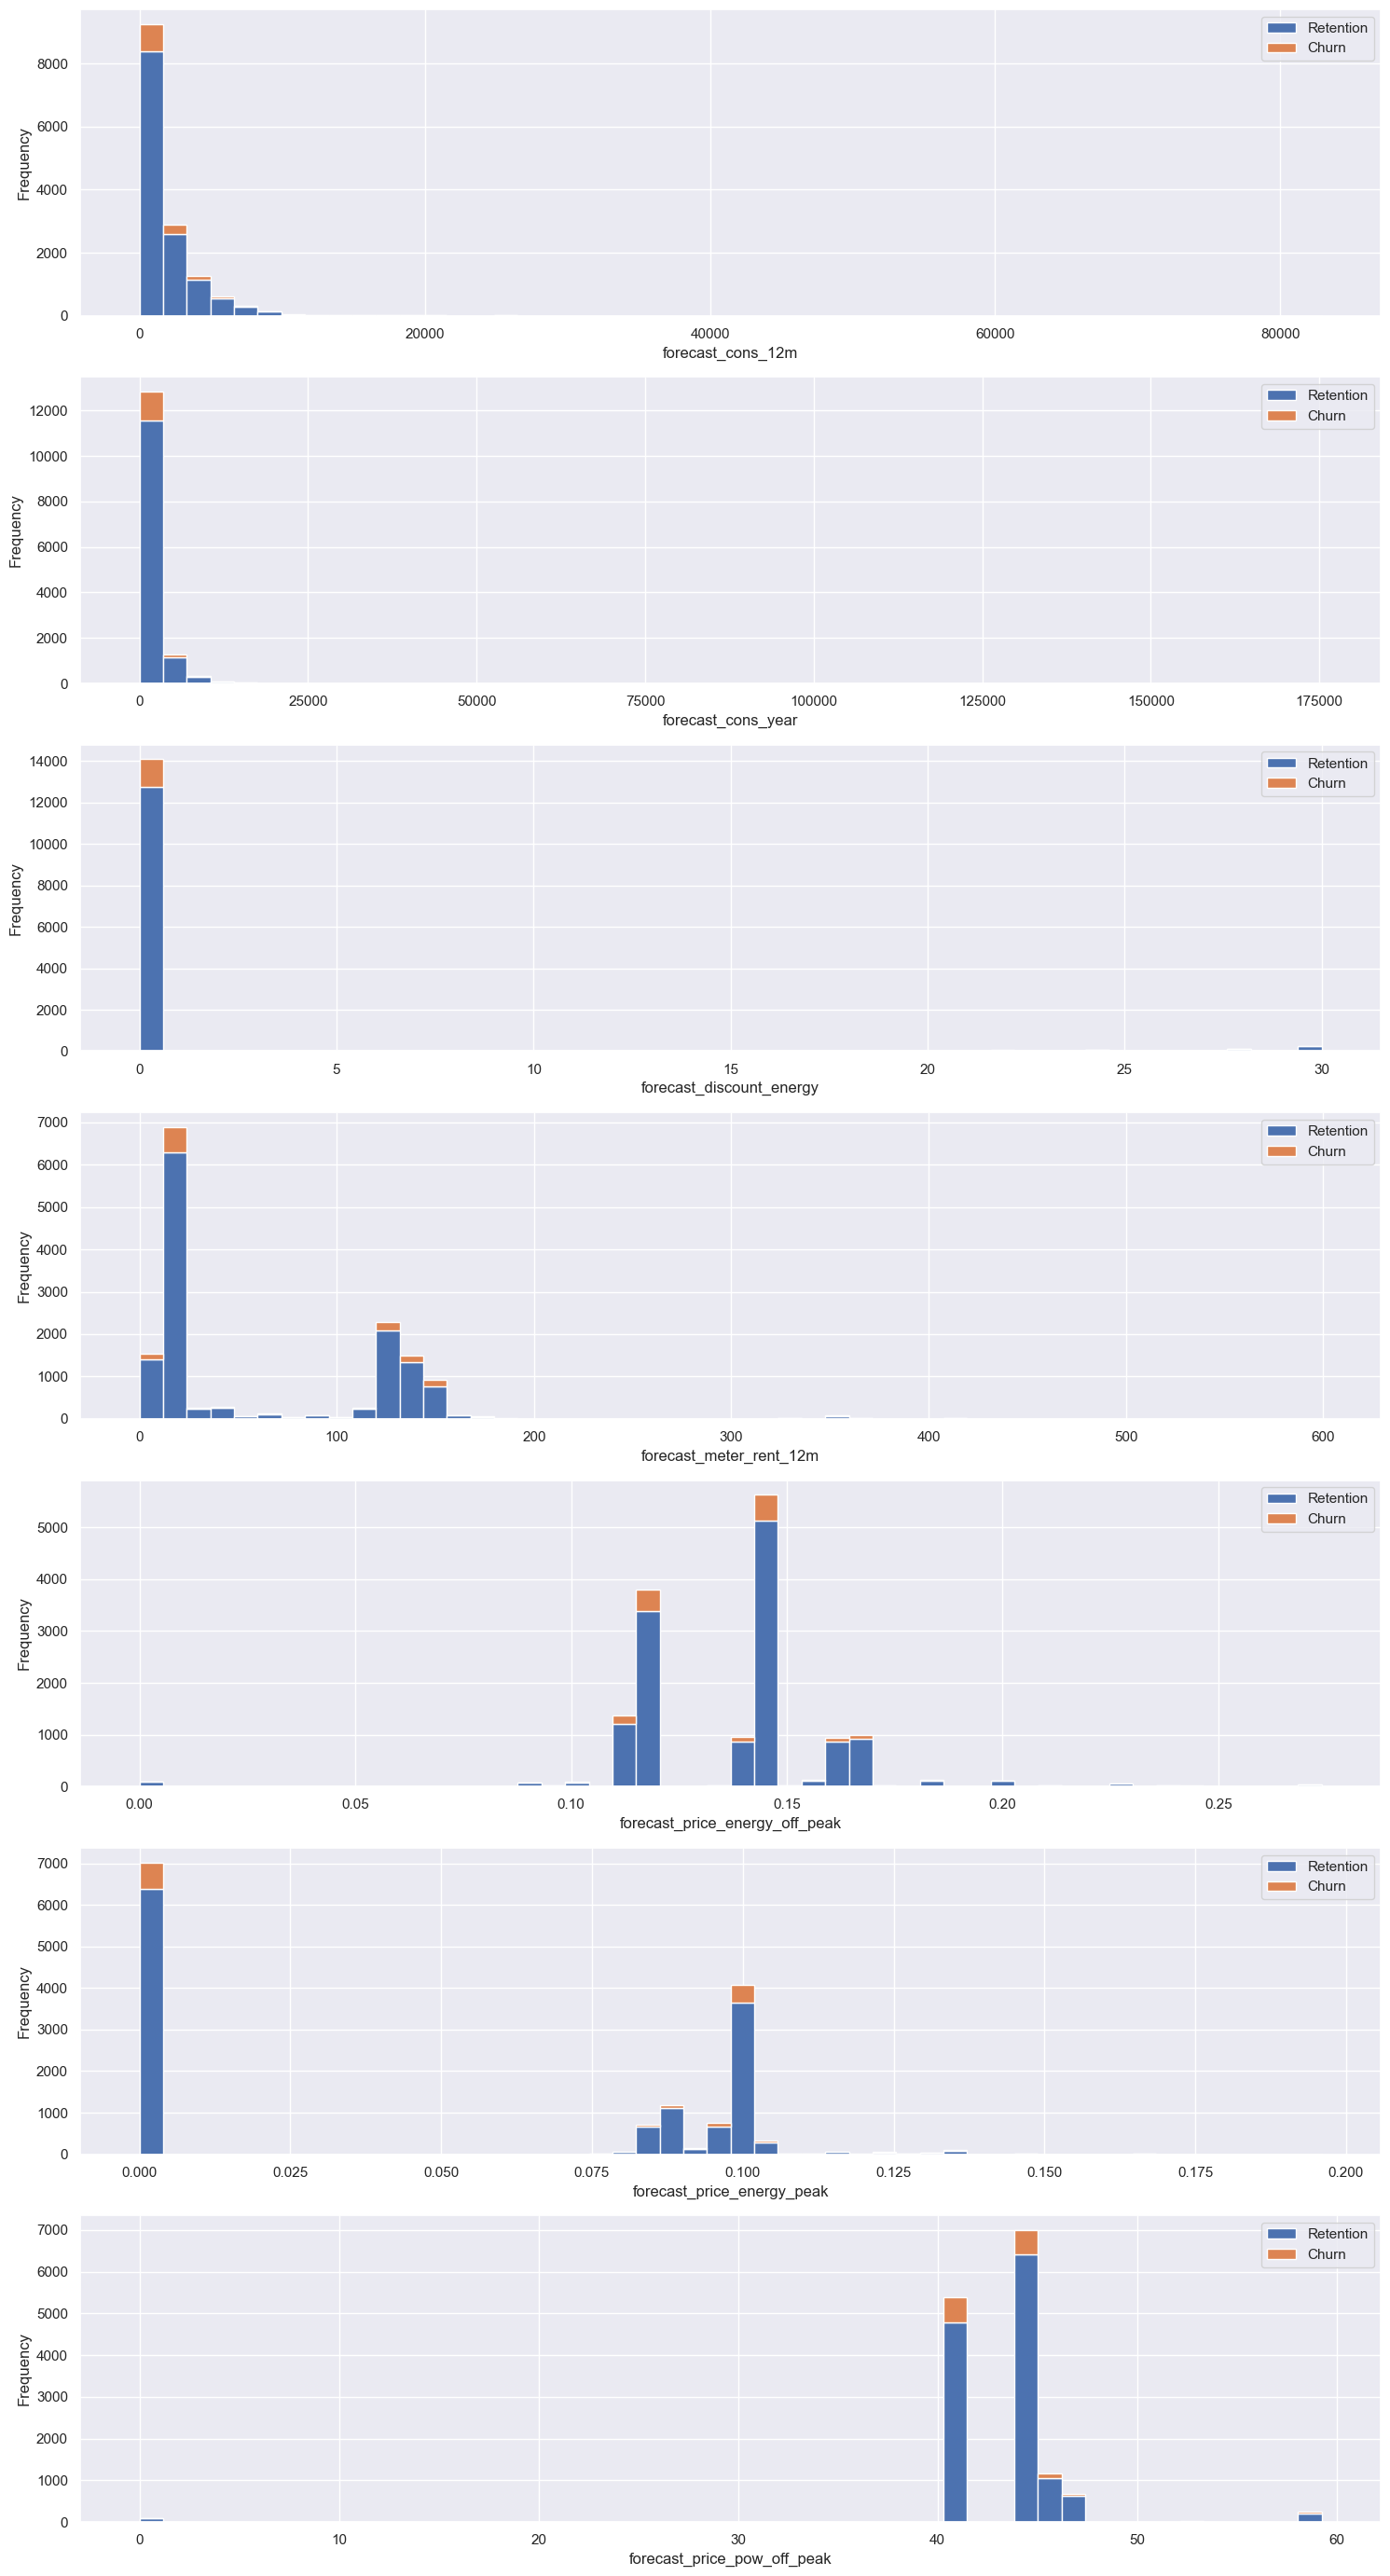

In [35]:
fig, axs = plt.subplots(nrows=7, figsize=(18,35))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

In [36]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

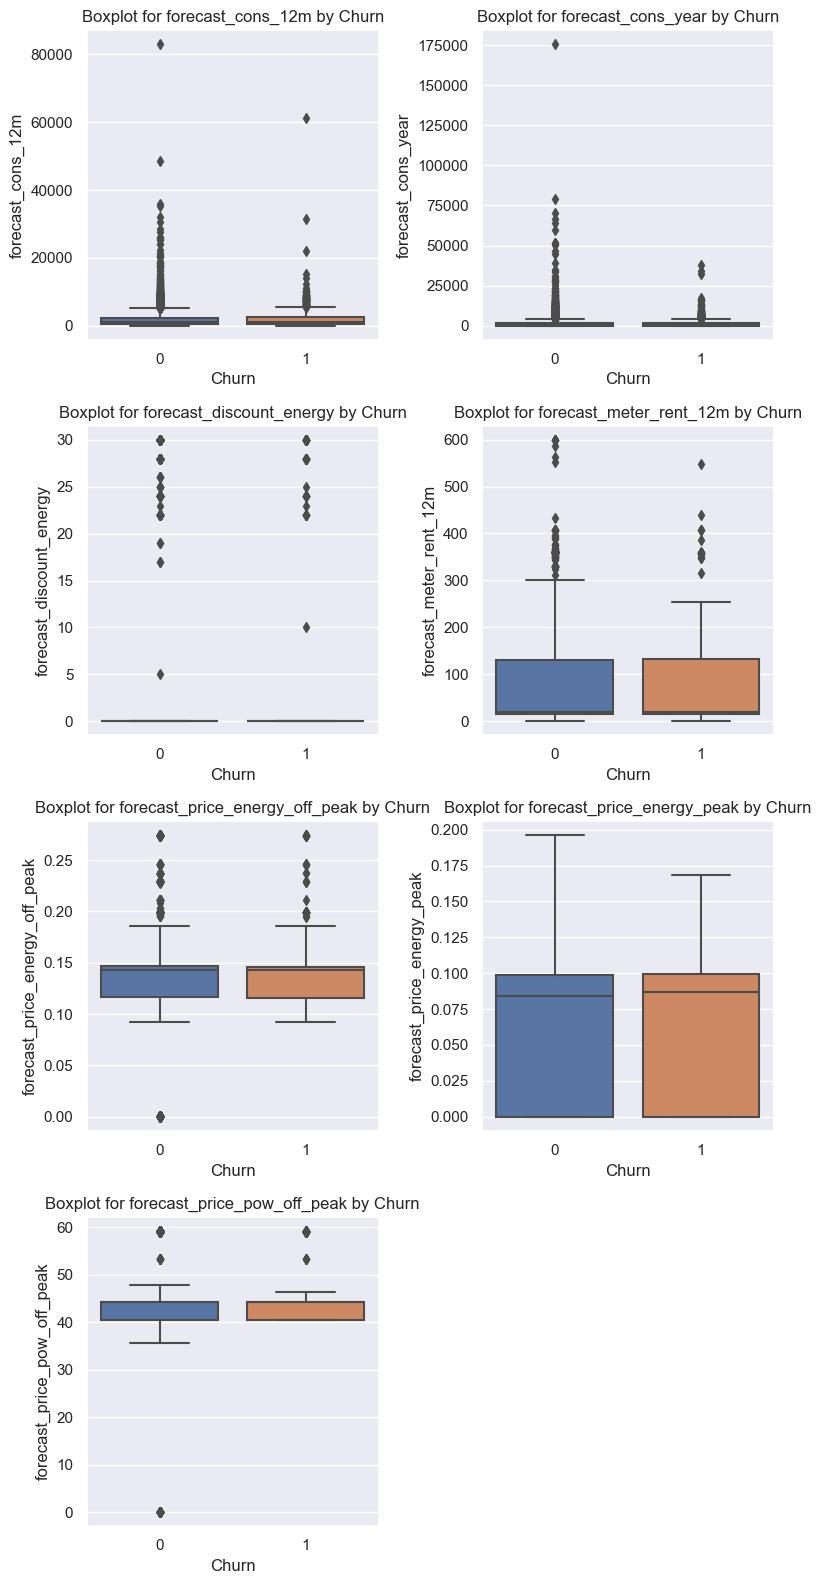

In [37]:
plt.figure(figsize=(8, 16))
for i, column in enumerate(forecast.columns):
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(data=forecast, x=client_df['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

### Contract Type

In [38]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

Text(0.5, 1.0, 'Contract Type')

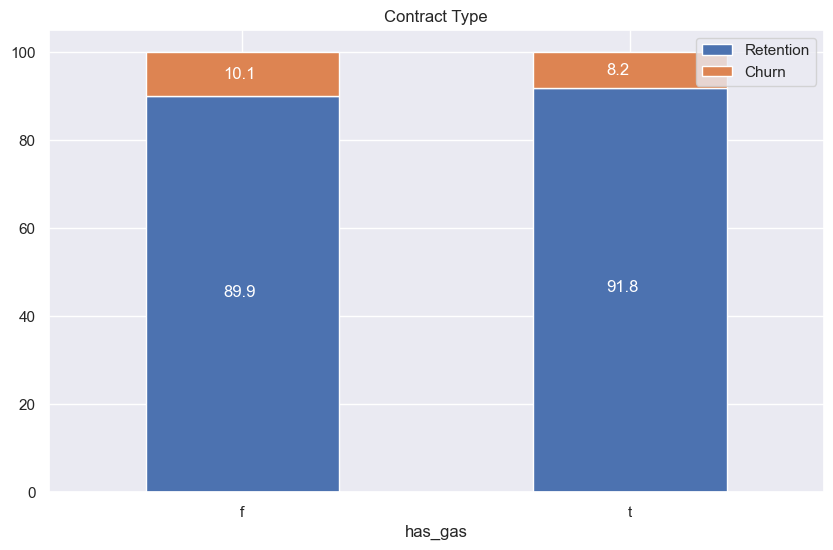

In [39]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(10,6),rot=0)
annotate_stacked_bars(ax, textsize=12)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

### Margin

In [40]:
margin = client_df[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

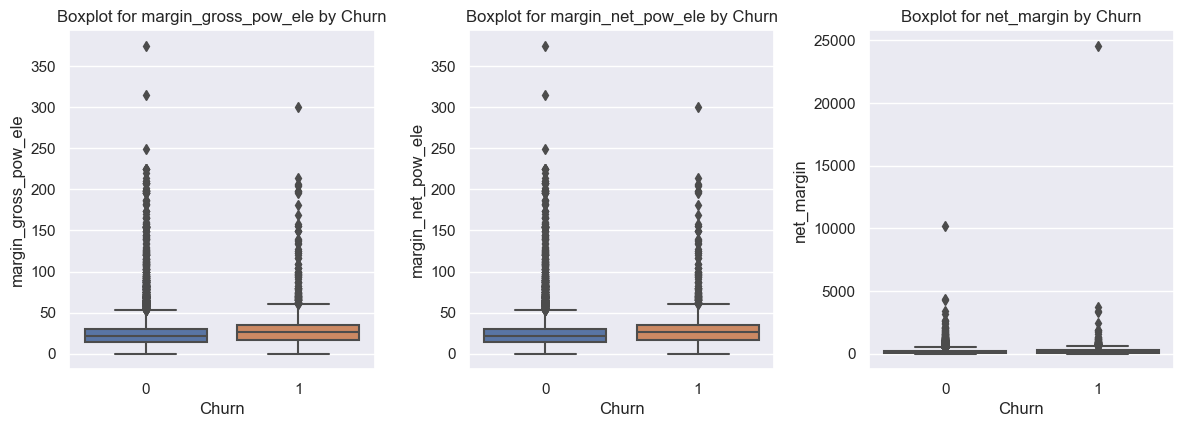

In [41]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(margin.columns):
    plt.subplot(2, 3, i + 1)
    
    sns.boxplot(data=margin, x=client_df['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

### Subscribed Power

In [42]:
power = client_df[["id", "pow_max", "churn"]]

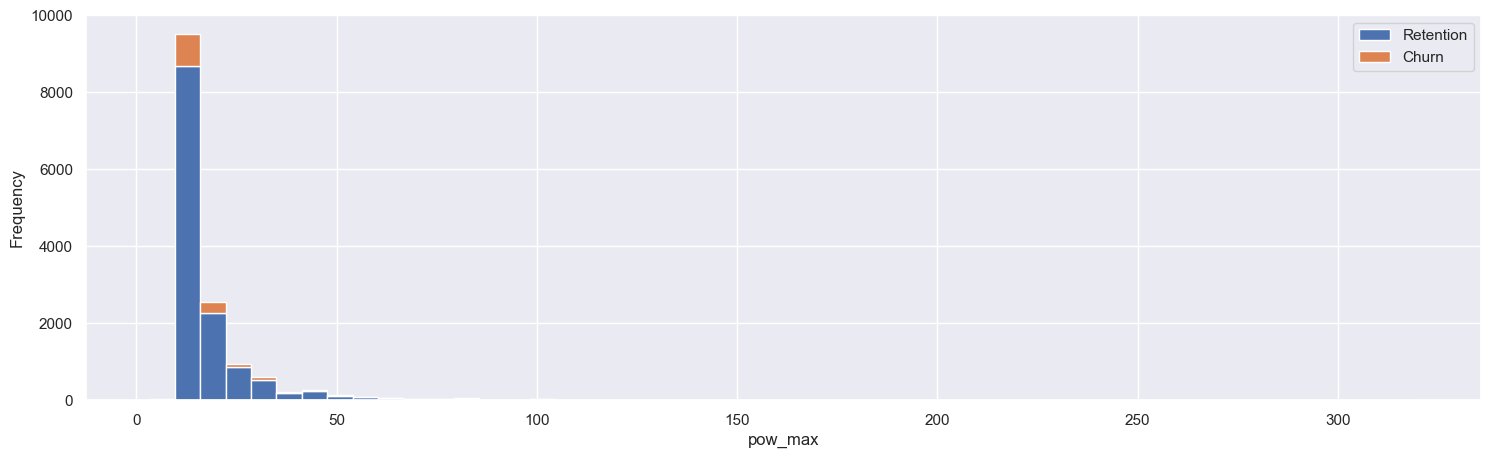

In [43]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(power, 'pow_max', axs)

In [73]:
# Remove non-numeric columns
client_df_numeric = client_df.select_dtypes(include=[np.number])

client_df_numeric.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0


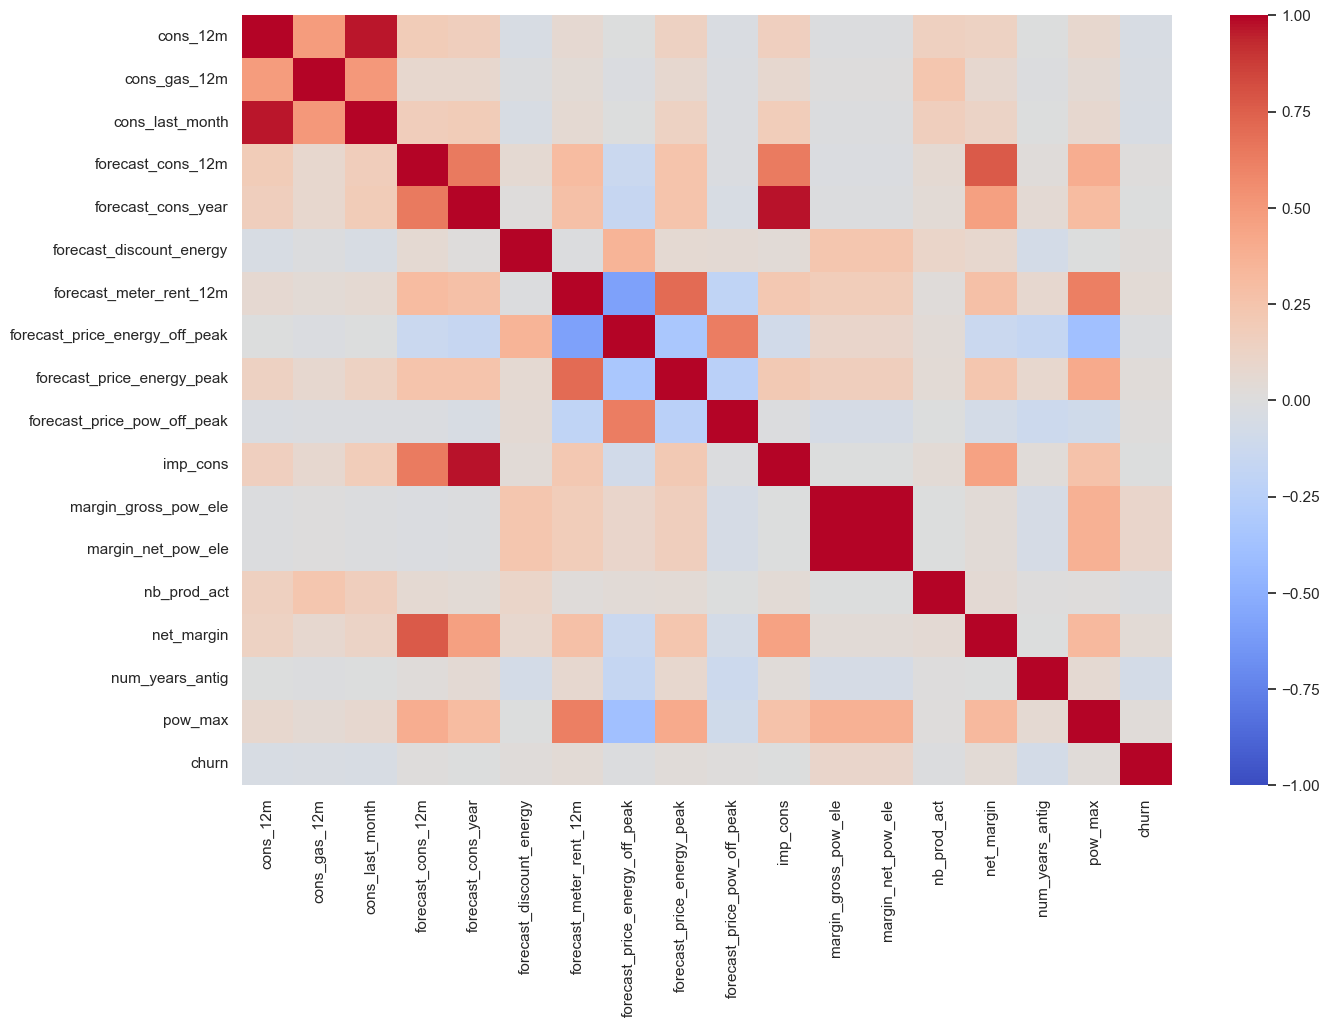

In [94]:
# Plot the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(client_df_numeric.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show();


In [93]:
# Calculate the correlation matrix for your DataFrame
correlation_matrix = client_df_numeric.corr()

# Stack the correlation matrix to create a Series with a MultiIndex
correlation_series = correlation_matrix.stack()

# Reset the index to turn the MultiIndex into columns
correlation_df = correlation_series.reset_index()

# Rename the columns for clarity
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter the DataFrame to include values from 1.00 to 0.50
correlation_filtered = correlation_df[(correlation_df['Correlation'] <= 0.99) & (correlation_df['Correlation'] >= 0.50)]

# Sort the DataFrame in descending order by correlation values
correlation_filtered_sorted = correlation_filtered.sort_values(by='Correlation', ascending=False)

# Define a function to map correlation values to colors
def color_map(val):
    color = sns.color_palette("coolwarm", as_cmap=True)(val)
    return f'background-color: rgb{tuple(np.round(np.array(color) * 255))}'

# Apply the color mapping function to the 'Correlation' column
styled_correlation_df = correlation_filtered_sorted.style.map(color_map, subset=['Correlation'])

# Display the styled DataFrame with colored correlation values
styled_correlation_df

,Variable 1,Variable 2,Correlation
184,imp_cons,forecast_cons_year,0.969395
82,forecast_cons_year,imp_cons,0.969395
36,cons_last_month,cons_12m,0.968212
2,cons_12m,cons_last_month,0.968212
255,net_margin,forecast_cons_12m,0.768537
68,forecast_cons_12m,net_margin,0.768537
116,forecast_meter_rent_12m,forecast_price_energy_peak,0.706376
150,forecast_price_energy_peak,forecast_meter_rent_12m,0.706376
75,forecast_cons_year,forecast_cons_12m,0.647727
58,forecast_cons_12m,forecast_cons_year,0.647727


### Price Data

In [49]:
price_df["id"].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

In [50]:
price_df["price_date"].value_counts()

price_date
2015-12-01    16094
2015-08-01    16094
2015-07-01    16090
2015-11-01    16087
2015-10-01    16085
2015-06-01    16085
2015-09-01    16082
2015-02-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

In [52]:
# Create a DataFrame 
date_count_df = pd.DataFrame({'Date': price_df["price_date"].value_counts().index, 'Count': price_df["price_date"].value_counts().values})

# Create a bar plot using Plotly Express
fig = px.bar(date_count_df, x='Date', y='Count', color='Date',
             title='Date Count',
             labels={'Date': 'Date', 'Count': 'Count'},
             height=500, width=700)

# Show the plot
fig.show()

In [53]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

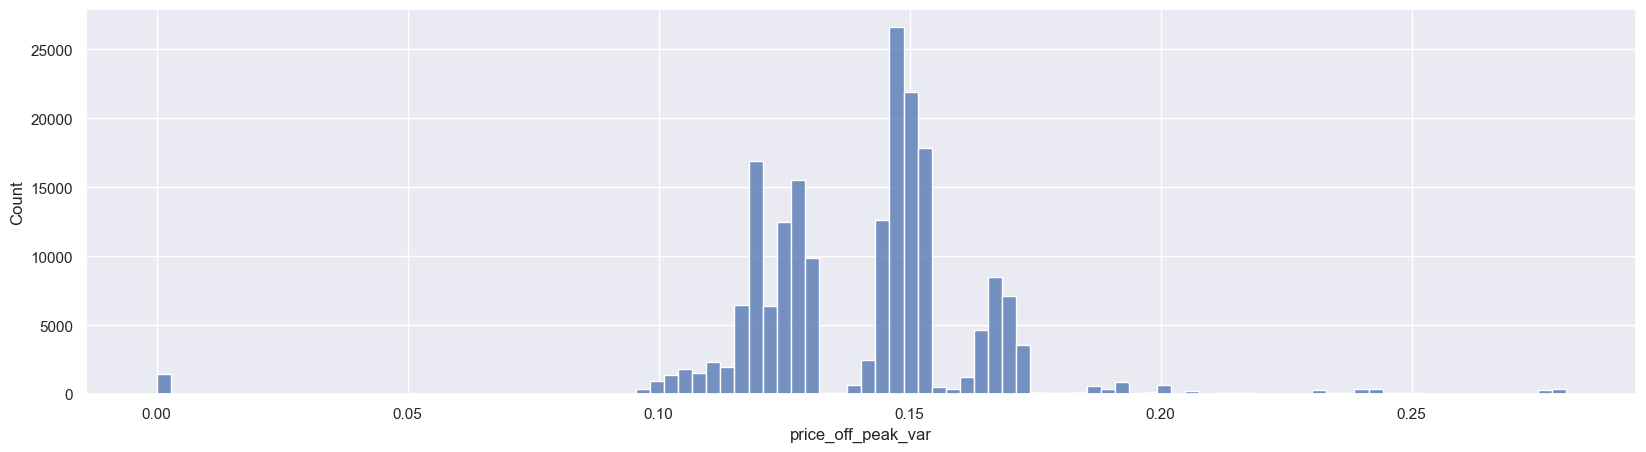

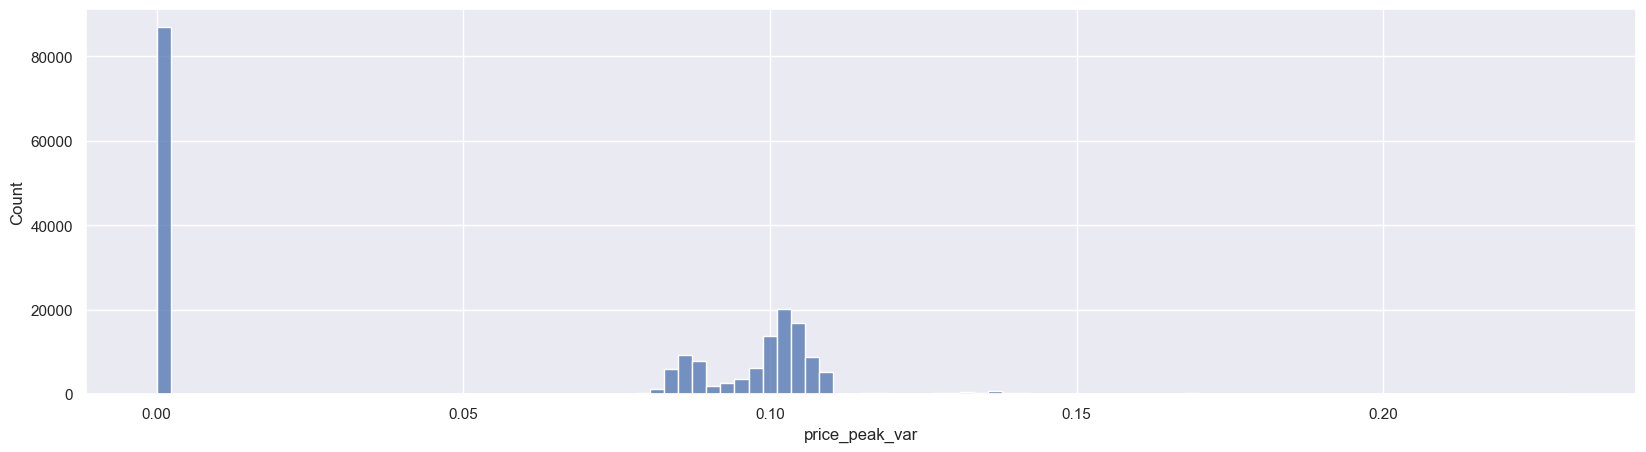

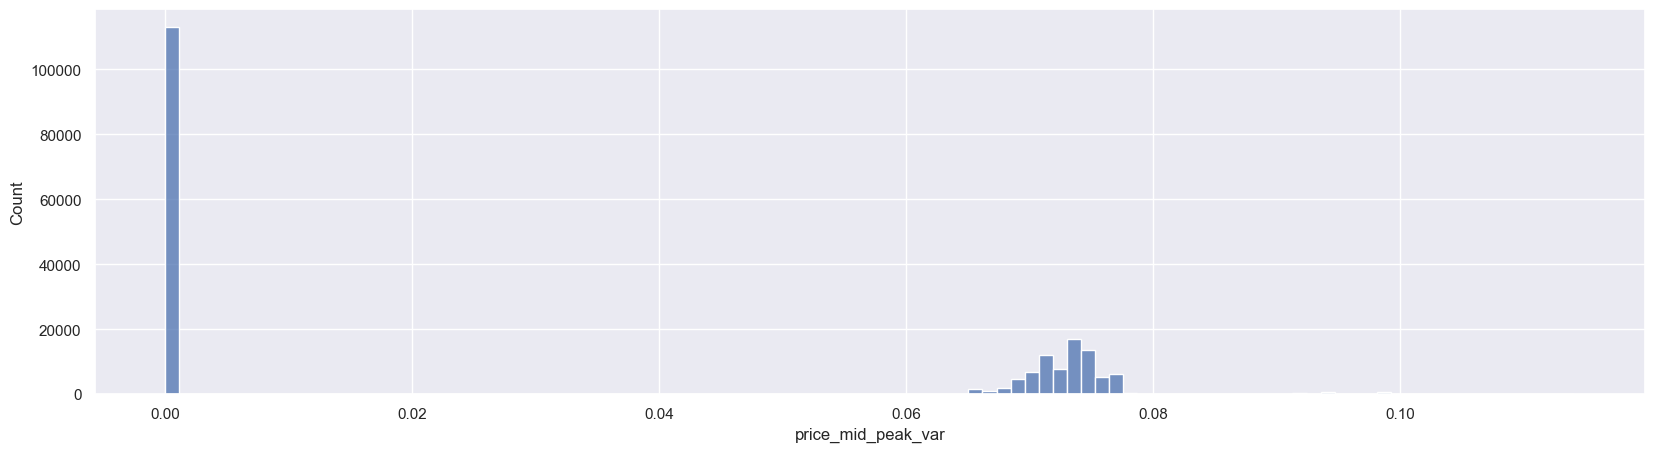

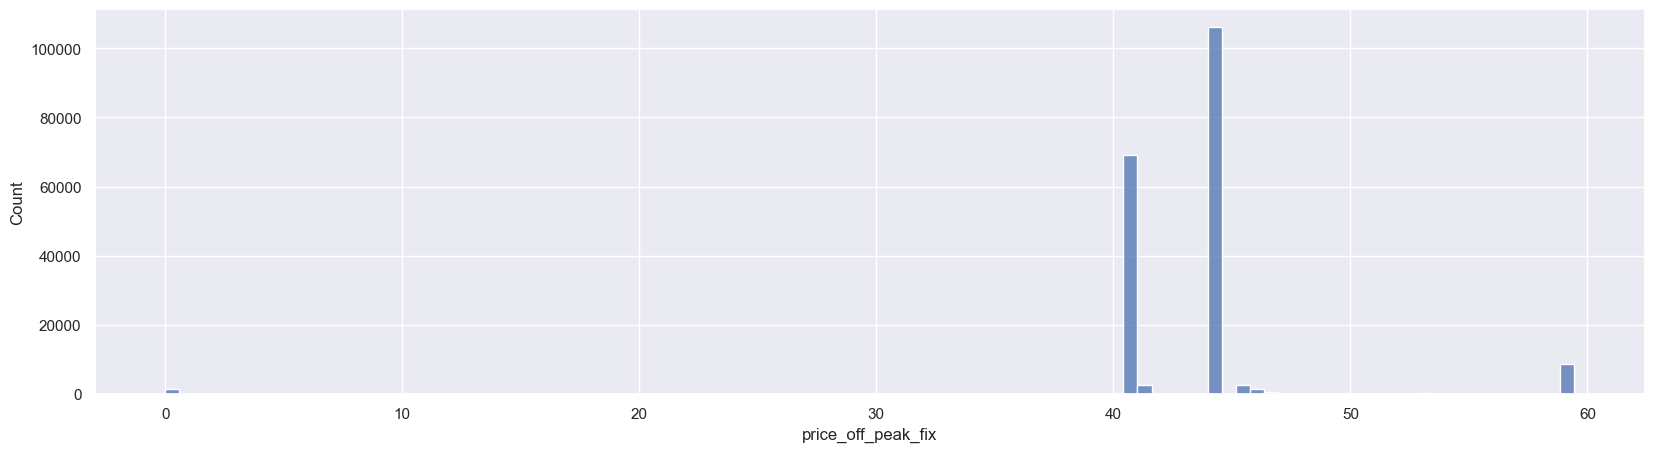

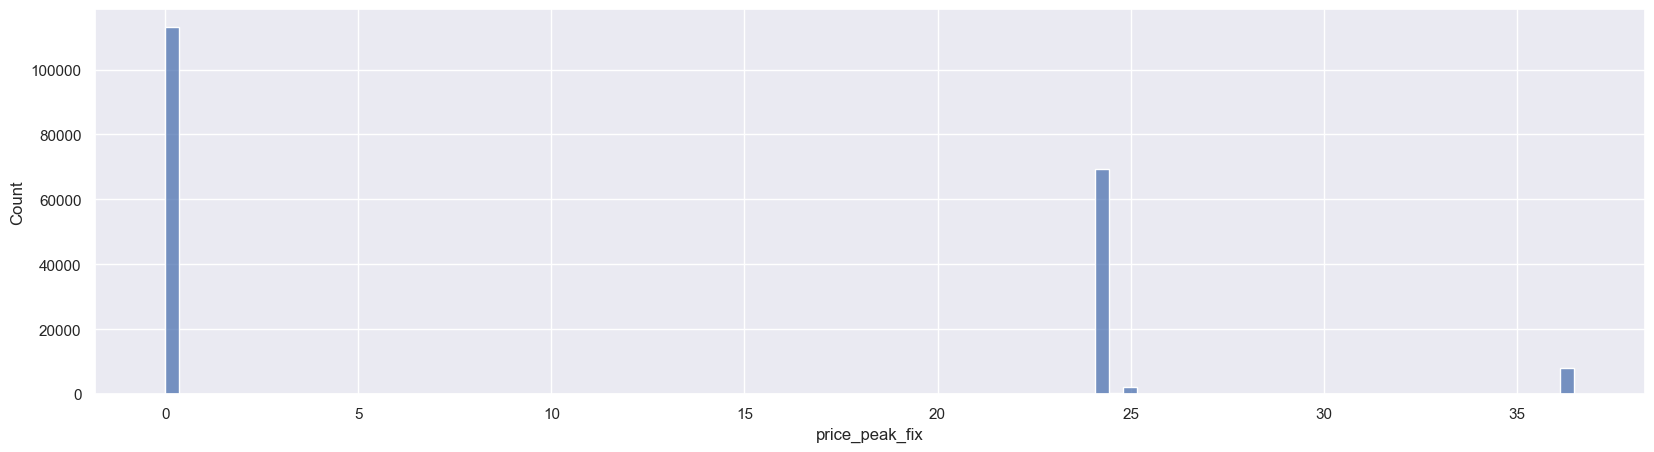

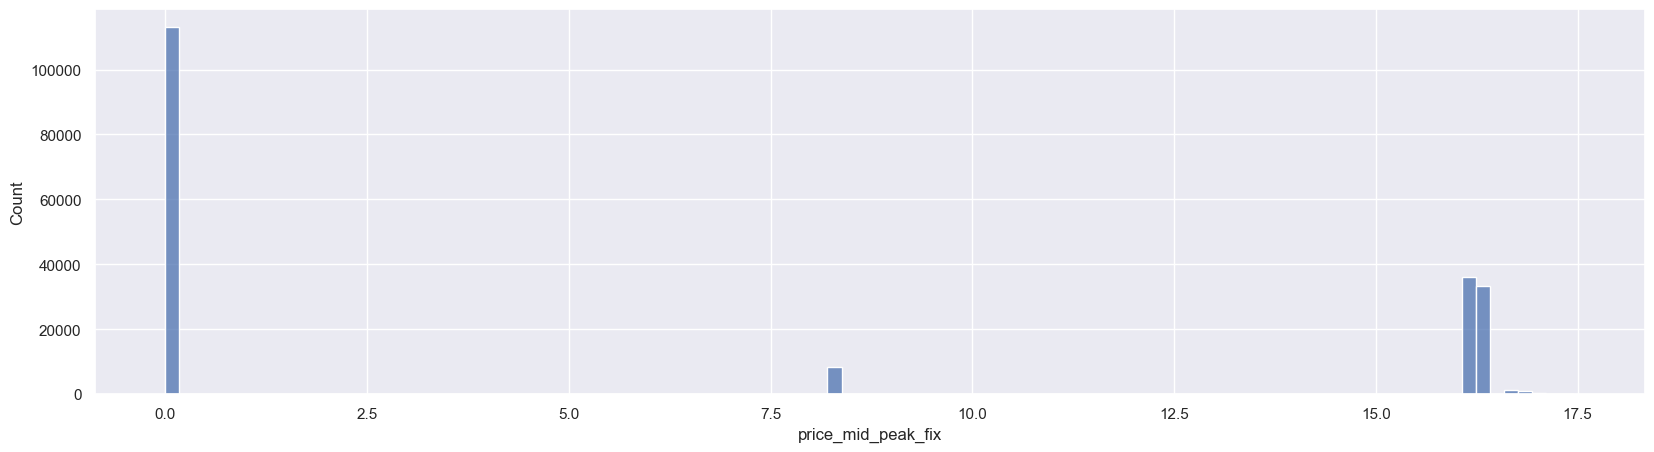

In [54]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

From the above histogram plots we can infer the following:
- The values of each feature are centred around some points.
- There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices.

Therefore, we need to analyse price sensivity only based on off-peak prices.

## Hypothesis Testing

### Now, let us check customers sensitivity to price. 

When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months.

In [111]:
# Recreate the mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [112]:
mean_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [114]:
# rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [115]:
# calculate the mean price by adding the fixed and variable prices
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [116]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_6m["mean_year_price_off_peak"] = mean_6m["mean_year_price_off_peak_var"] + mean_6m["mean_year_price_off_peak_fix"]
mean_6m["mean_year_price_peak"] = mean_6m["mean_year_price_peak_var"] + mean_6m["mean_year_price_peak_fix"]
mean_6m["mean_year_price_med_peak"] = mean_6m["mean_year_price_mid_peak_var"] + mean_6m["mean_year_price_mid_peak_fix"]

In [117]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [118]:

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [119]:
price_features.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,price_date_y,mean_year_price_off_peak_var_y,mean_year_price_peak_var_y,mean_year_price_mid_peak_var_y,mean_year_price_off_peak_fix_y,mean_year_price_peak_fix_y,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,price_date,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,2015-09-15 20:00:00,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


### Merging the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [120]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,price_date_y,mean_year_price_off_peak_var_y,mean_year_price_peak_var_y,mean_year_price_mid_peak_var_y,mean_year_price_off_peak_fix_y,mean_year_price_peak_fix_y,mean_year_price_mid_peak_fix_y,mean_year_price_off_peak_y,mean_year_price_peak_y,mean_year_price_med_peak_y,price_date,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,2015-11-16,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [121]:
price_churn.duplicated().sum()

0

In [131]:
# Remove non-numeric columns
price_churn_numeric = price_churn.select_dtypes(include=[np.number])

corr = price_churn_numeric.corr().round(2)


In [132]:
fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.update_layout(width=1000, height=1000) 
fig.show()

 **The above plot shows the correlation betweeen price variables with each other and with churn,**
 
 **however, the correlation between churn and prices variables is very low, which mean customers' churn is _not_ sensitive to price change.**

In [122]:
# save the dataset for further analysis
price_churn.to_csv('price_churn.csv', index = False)